In [ ]:
# librery for the tensorflow and other of it.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# importing other important packeges.
import os 
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)



In [ ]:
# Link ot the download source from where the file will download.
# and as it is zip file we will extract it in this zip_dir.

_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_dir = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=_URL, extract=True)

68608000/68606236 [==============================] - 0s 0us/step


In [ ]:
# We will find where our file is store in the machine and it will return us the path.

zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

val_cat_dir = os.path.join(validation_dir, 'cats')
val_dog_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
num_cat_train = len(os.listdir(train_cat_dir))
num_dog_train = len(os.listdir(train_dog_dir))

num_cat_validation = len(os.listdir(val_cat_dir))
num_dog_validation = len(os.listdir(val_dog_dir))

num_total_train = num_cat_train + num_dog_train
num_total_validation = num_cat_validation + num_dog_validation

In [ ]:
print("Number or training examples", num_total_train)
print("Number or validation examples", num_total_validation)

print("Number or training examples of cats: ", num_cat_train)
print("Number or training examples of dogs: ", num_dog_train)

print("Number or validation examples of cats:", num_cat_validation)
print("Number or validation examples of dogs: ", num_dog_validation)

Number or training examples 2000
Number or validation examples 1000
Number or training examples of cats:  1000
Number or training examples of dogs:  1000
Number or validation examples of cats: 500
Number or validation examples of dogs:  500


**This is the data preperation phase.**



In [ ]:
BATCH_SIZE = 32
img_size = 150


In [ ]:
training_img_generator = ImageDataGenerator(rescale=1./255,
                                            rotation_range=40,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip = True,
                                            fill_mode = 'nearest')
validation_img_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
# flow form dir will let us import images from our disck and will rescale it with the single line of code.

train_data_gen = training_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=train_dir,
                                                            shuffle=True,
                                                            target_size=(img_size, img_size),
                                                            class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:

val_data_gen = training_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=validation_dir,
                                                            shuffle=False,
                                                            target_size=(img_size, img_size),
                                                            class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
sample_train_images, _ = next(train_data_gen)

In [ ]:
# this function will show a gird of the images of 5 images in the same column.

def plotImage(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()



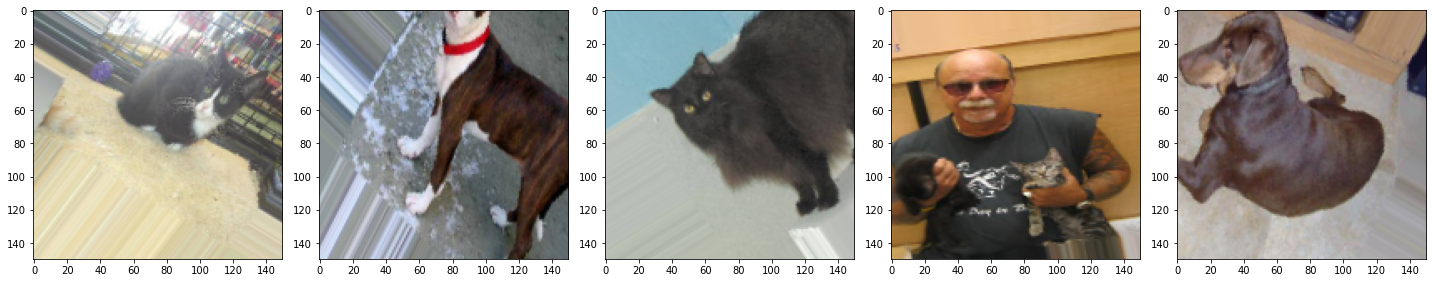

In [ ]:
plotImage(sample_train_images[:5])

In [ ]:
model = tf.keras.models.Sequential([
       tf.keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'),                            
       tf.keras.layers.MaxPooling2D(2,2),

       tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
       tf.keras.layers.MaxPooling2D(2,2),

       tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
       tf.keras.layers.MaxPooling2D(2, 2),

       tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
       tf.keras.layers.MaxPooling2D(2, 2),

       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(512, activation='relu'),
       tf.keras.layers.Dense(2, activation='softmax')

])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']

)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
EPOCH = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(num_total_train / float(BATCH_SIZE))),
    epochs = EPOCH,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(num_total_validation / float(BATCH_SIZE)))

)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
63/63 [==============================] - 54s 337ms/step - loss: 0.7008 - accuracy: 0.5046 - val_loss: 0.6925 - val_accuracy: 0.5020
Epoch 2/100
63/63 [==============================] - 21s 328ms/step - loss: 0.6935 - accuracy: 0.5011 - val_loss: 0.6756 - val_accuracy: 0.6120
Epoch 3/100
63/63 [==============================] - 21s 327ms/step - loss: 0.6774 - accuracy: 0.5595 - val_loss: 0.6891 - val_accuracy: 0.5420
Epoch 4/100
63/63 [==============================] - 21s 327ms/step - loss: 0.6867 - accuracy: 0.5482 - val_loss: 0.6949 - val_accuracy: 0.5100
Epoch 5/100
63/63 [==============================] - 21s 327ms/step - loss: 0.6759 - accuracy: 0.5654 - val_loss: 0.6747 - val_accuracy: 0.5590
Epoch 6/100
63/63 [==============================] - 21s 329ms/step - loss: 0.6773 - accuracy: 0.5691 - val_loss: 0.6799 - val_accuracy: 0.5950
Epoch 7/100
63/63 [==============================] - 21s 333ms/step - loss: 0.6617 - accuracy: 0.5759 - val_loss: 0.6455 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Loss')

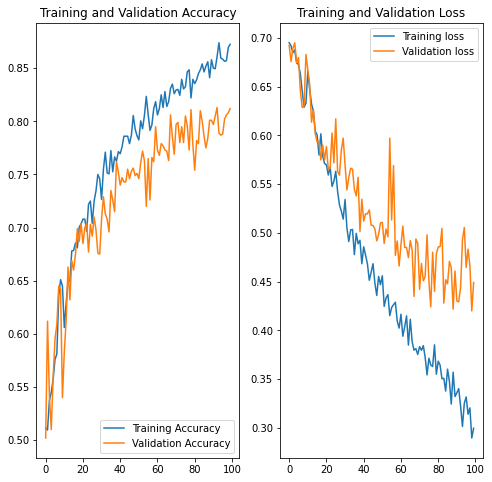

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(EPOCH)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training loss")
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")